<a href="https://colab.research.google.com/github/ShreyamBaliga/zomato_res_rating/blob/main/Datamining_Zomato_RatingPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt


In [ ]:
data = pd.read_csv('Zomato_delivery.csv', sep = ',', encoding='mac_roman')
data.head()

,Restaurant ID,Restaurant Name,City,Tier,Cuisine,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating text,Votes
0,3400025,Jahanpanah,Agra,2,Indian,850,INR,0,0,0,3,3.9,Good,140
1,3400341,Rangrezz Restaurant,Agra,2,Indian,700,INR,0,0,0,2,3.5,Good,71
2,3400005,Time2Eat - Mama Chicken,Agra,2,Indian,500,INR,0,0,0,2,3.6,Good,94
3,3400021,Chokho Jeeman Marwari Jain Bhojanalya,Agra,2,Indian,400,INR,0,0,0,2,4.0,Very Good,87
4,3400017,Pinch Of Spice,Agra,2,Indian,1000,INR,0,0,0,3,4.2,Very Good,177


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8652 entries, 0 to 8651
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         8652 non-null   int64  
 1   Restaurant Name       8652 non-null   object 
 2   City                  8652 non-null   object 
 3   Tier                  8652 non-null   int64  
 4   Cuisine               8652 non-null   object 
 5   Average Cost for two  8652 non-null   int64  
 6   Currency              8652 non-null   object 
 7   Has Table booking     8652 non-null   int64  
 8   Has Online delivery   8652 non-null   int64  
 9   Is delivering now     8652 non-null   int64  
 10  Price range           8652 non-null   int64  
 11  Aggregate rating      8652 non-null   float64
 12  Rating text           8652 non-null   object 
 13  Votes                 8652 non-null   int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 946.4+ KB


In [ ]:
data.shape

(8652, 14)

In [ ]:
data.nunique()

Restaurant ID           8652
Restaurant Name         6604
City                      43
Tier                       3
Cuisine                   11
Average Cost for two      79
Currency                   1
Has Table booking          2
Has Online delivery        2
Is delivering now          2
Price range                4
Aggregate rating          33
Rating text                6
Votes                    871
dtype: int64

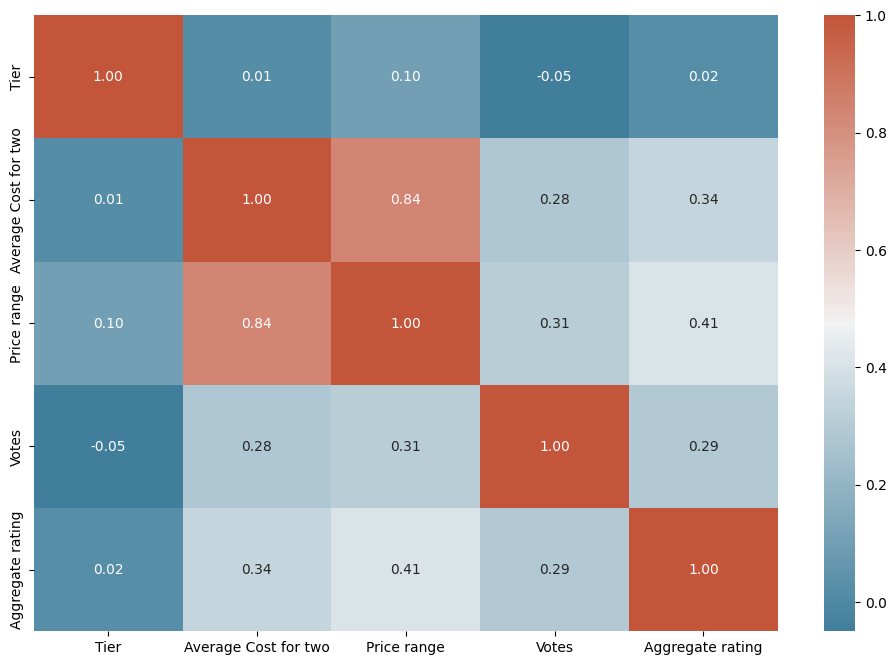

In [ ]:
plt.figure(figsize=(12,8))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Getting the Upper Triangle of the co-relation matrix
#matrix = np.triu(car.corr())

# Create a visual view of the pairwise correlations
sns.heatmap(data[numerical].corr(),annot=True,fmt='.2f',cmap=cmap)
plt.show()

In [ ]:
numerical = ['Tier', 'Average Cost for two', 'Price range', 'Votes', 'Aggregate rating']

In [ ]:
y=data['Aggregate rating']
X=data.drop('Aggregate rating',axis=1)
print(X.head())
#print(y.head())

   Restaurant ID  Tier  Average Cost for two  Has Table booking  \
0        3400025     2                   850                  0   
1        3400341     2                   700                  0   
2        3400005     2                   500                  0   
3        3400021     2                   400                  0   
4        3400017     2                  1000                  0   

   Has Online delivery  Is delivering now  Price range  Votes  \
0                    0                  0            3    140   
1                    0                  0            2     71   
2                    0                  0            2     94   
3                    0                  0            2     87   
4                    0                  0            3    177   

   Restaurant Name_ Let's Burrrp  Restaurant Name_#45  ...  Cuisine_Fast food  \
0                              0                    0  ...                  0   
1                              0            

In [ ]:
data = pd.get_dummies(data, dtype=int)

In [ ]:
data.head()

,Restaurant ID,Tier,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Votes,Restaurant Name_ Let's Burrrp,...,Cuisine_Fast food,Cuisine_Indian,Cuisine_Middle Eastern,Currency_INR,Rating text_Average,Rating text_Excellent,Rating text_Good,Rating text_Not rated,Rating text_Poor,Rating text_Very Good
0,3400025,2,850,0,0,0,3,3.9,140,0,...,0,1,0,1,0,0,1,0,0,0
1,3400341,2,700,0,0,0,2,3.5,71,0,...,0,1,0,1,0,0,1,0,0,0
2,3400005,2,500,0,0,0,2,3.6,94,0,...,0,1,0,1,0,0,1,0,0,0
3,3400021,2,400,0,0,0,2,4.0,87,0,...,0,1,0,1,0,0,0,0,0,1
4,3400017,2,1000,0,0,0,3,4.2,177,0,...,0,1,0,1,0,0,0,0,0,1


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

###
#scaler = StandardScaler()
#scale= scaler.fit(X_train)
#X_train= scale.transform(X_train)
#X_test= scale.transform(X_test)


In [ ]:
model=LinearRegression()
model.fit(X_train,y_train)

pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, pred)

0.9828363268714084

In [ ]:
confusion_matrix(y_test, pred)

array([[1185,   64],
       [ 424,   58]])

In [ ]:
tn,fp,fn,tp= confusion_matrix(y_test,pred).ravel()
(tn,fp,fn,tp)

(1185, 64, 424, 58)

In [ ]:
matrix=classification_report(y_test,pred)
print('Report: \n', matrix)

Report: 
               precision    recall  f1-score   support

           0       0.74      0.95      0.83      1249
           1       0.48      0.12      0.19       482

    accuracy                           0.72      1731
   macro avg       0.61      0.53      0.51      1731
weighted avg       0.66      0.72      0.65      1731



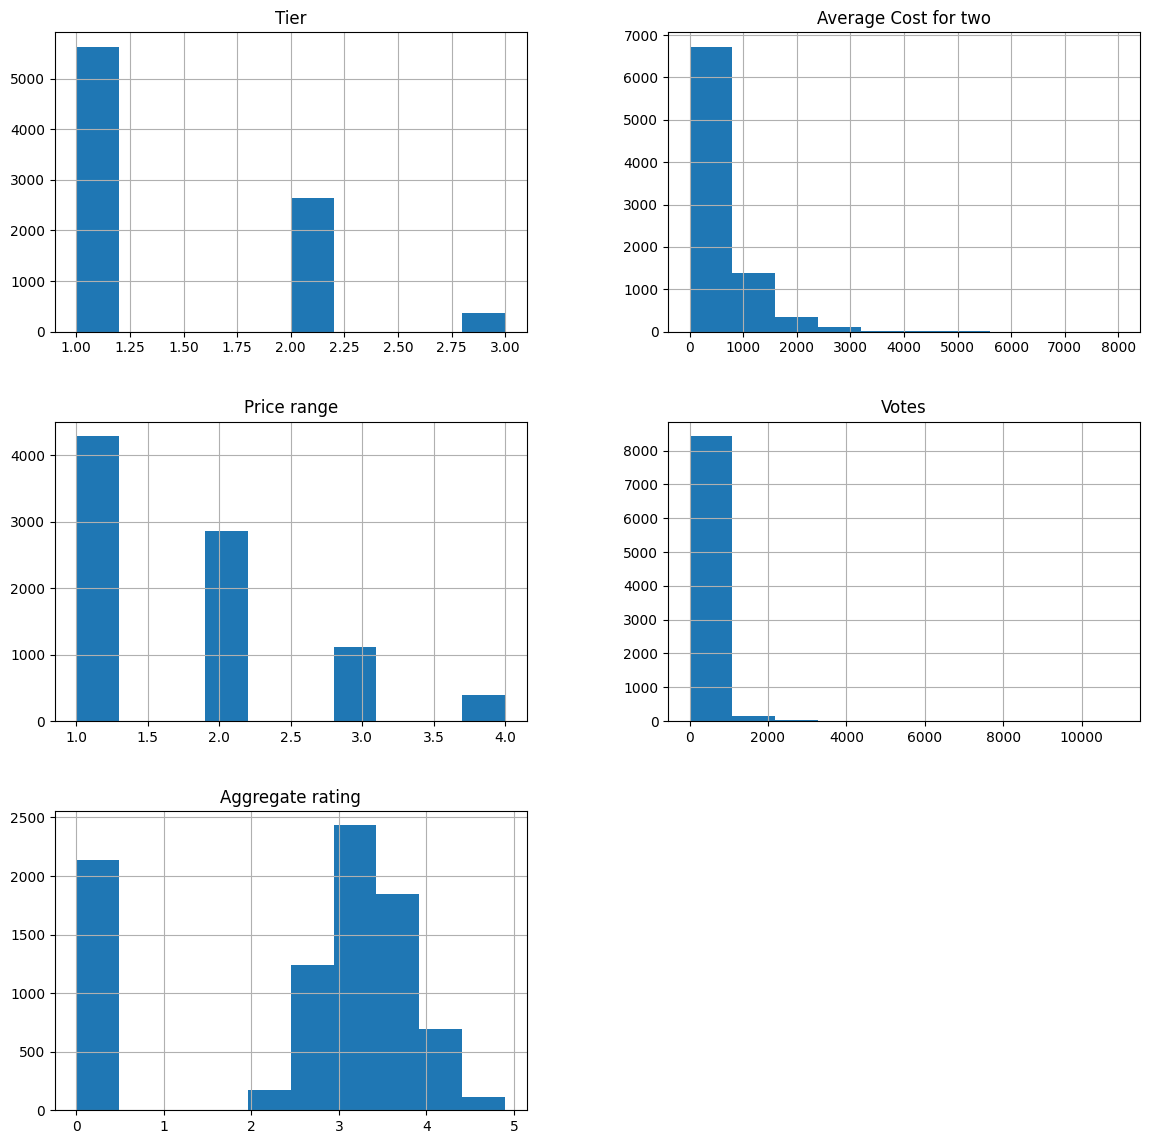

In [ ]:
data[numerical].hist(figsize=(14,14))
plt.show()